### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

---

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'amz_uk_price_prediction_dataset.csv'  # Assumed path for the dataset
df = pd.read_csv(file_path)

# Check the first few rows and the column names to familiarize ourselves with the data structure
df.head(), df.columns

(   uid        asin                                              title  stars  \
 0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
 1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
 2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
 3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
 4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   
 
    reviews  price  isBestSeller  boughtInLastMonth        category  
 0    15308  21.99         False                  0  Hi-Fi Speakers  
 1    98099  23.99          True                  0  Hi-Fi Speakers  
 2    15308  21.99         False                  0  Hi-Fi Speakers  
 3     7205  31.99         False                  0  Hi-Fi Speakers  
 4     1881  17.99         False                  0  Hi-Fi Speakers  ,
 Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
        'bough

In [6]:
# Generate a frequency table for the product 'category'
category_counts = df['category'].value_counts()

# Top 5 most listed product categories
top_5_categories = category_counts.head(5)

# Display the frequency table and top 5 categories
category_counts, top_5_categories

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
 Name: count, dtype: int64)

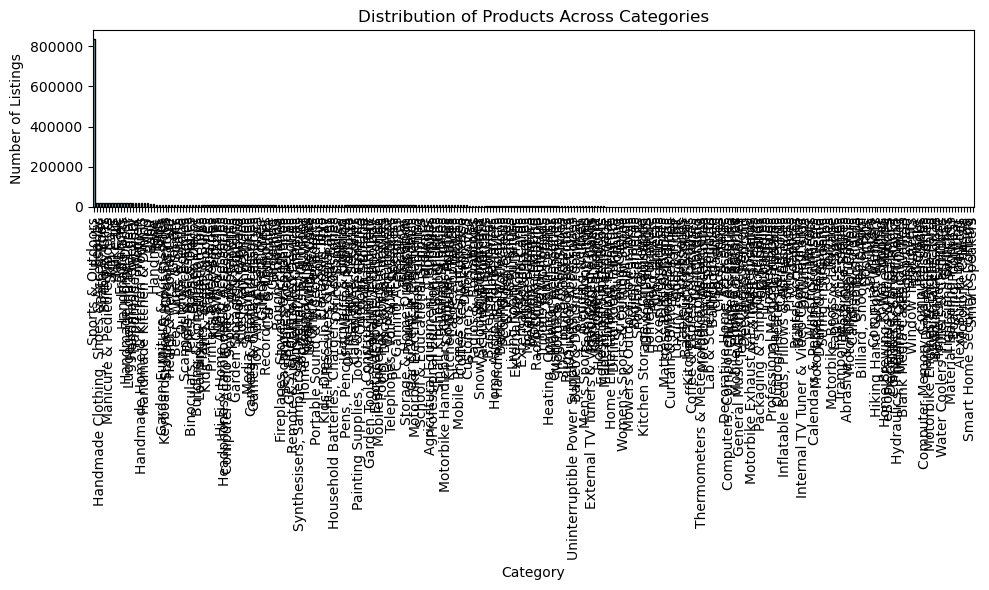

In [11]:
import matplotlib.pyplot as plt

# 1.1 Frequency Table for 'category'
category_counts = df['category'].value_counts()

# Top 5 most listed categories
top_5_categories = category_counts.head(5)

# 1.2.1 Bar Chart for Category Distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Products Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 1.2.2 Pie Chart for Top 5 Categories


### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

---

In [7]:
# Calculate measures of centrality (mean, median, mode) for 'price'
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

# Calculate measures of dispersion (variance, std deviation, range, IQR) for 'price'
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

# Display the results
centrality_measures = {
    "Mean Price": mean_price,
    "Median Price": median_price,
    "Mode Price": mode_price
}

dispersion_measures = {
    "Variance": variance_price,
    "Standard Deviation": std_dev_price,
    "Range": range_price,
    "Interquartile Range": iqr_price
}

centrality_measures, dispersion_measures


({'Mean Price': 89.24380943923663, 'Median Price': 19.09, 'Mode Price': 9.99},
 {'Variance': 119445.48532256528,
  'Standard Deviation': 345.60886175352226,
  'Range': 100000.0,
  'Interquartile Range': 36.0})

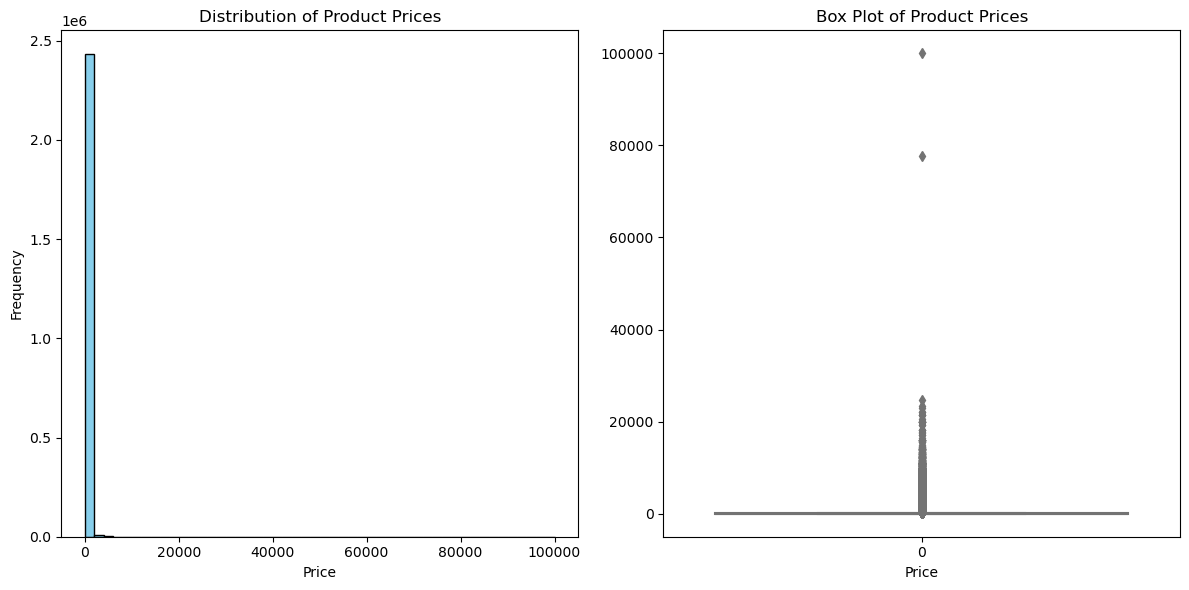

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Histogram and Box Plot for the price distribution
plt.figure(figsize=(12, 6))

# 3.1 Histogram for Price Distribution
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 3.2 Box Plot for Price Distribution
plt.subplot(1, 2, 2)
sns.boxplot(df['price'], color='lightgreen')
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')

plt.tight_layout()
plt.show()


### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 


Mean Rating: 2.152836472966065
Median Rating: 0.0
Mode Rating: 0.0

Variance of Ratings: 4.81743402976196
Standard Deviation of Ratings: 2.1948653785054697
Interquartile Range (IQR) of Ratings: 4.4

Skewness of Ratings: 0.08120730776283354
Kurtosis of Ratings: -1.926004642549839


c:\Users\danny\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


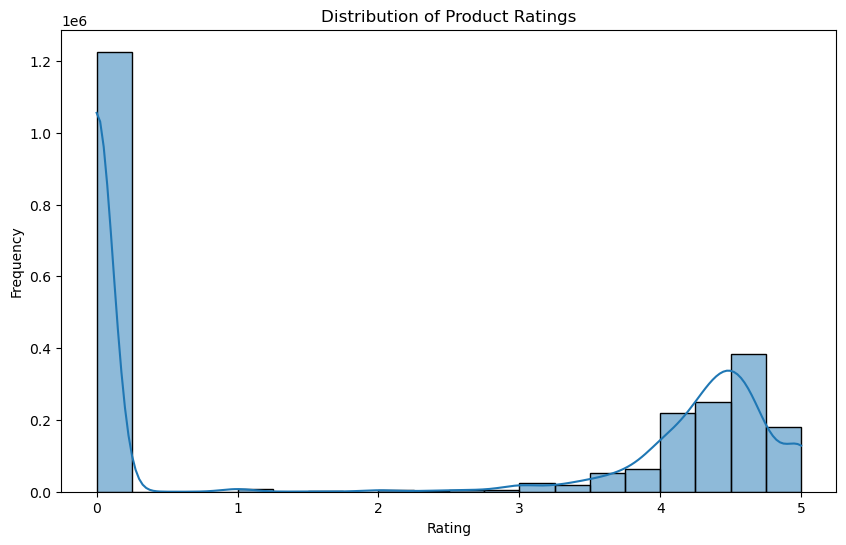

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


# 3.1 Measures of Centrality for 'stars' (ratings)
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

# 3.2 Measures of Dispersion for 'stars' (ratings)
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

# 3.3 Shape of the Distribution
skewness_rating = skew(df['stars'].dropna())
kurtosis_rating = kurtosis(df['stars'].dropna())

# Print results
print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}\n")

print(f"Variance of Ratings: {variance_rating}")
print(f"Standard Deviation of Ratings: {std_dev_rating}")
print(f"Interquartile Range (IQR) of Ratings: {iqr_rating}\n")

print(f"Skewness of Ratings: {skewness_rating}")
print(f"Kurtosis of Ratings: {kurtosis_rating}")

# 3.4 Visualization: Histogram for Rating Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['stars'].dropna(), bins=20, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
